# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 1 
Read the dataset given in file named 'bigcity.csv'.

In [55]:
import numpy as np
import pandas as pd

In [56]:
big_df=pd.read_csv("bigcity.csv")

In [57]:
big_df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [58]:
big_df.rename(columns={"u" : "1920_pop(u)", "x" : "1930_pop(x)"},inplace=True)
big_df

,Unnamed: 0,1920_pop(u),1930_pop(x)
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75
5,6,37,63
6,7,29,50
7,8,23,48
8,9,30,111
9,10,2,50


# Question 2 - Check the dataset for any missing values and also print out the correlation matrix 

In [59]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Unnamed: 0     49 non-null int64
1920_pop(u)    49 non-null int64
1930_pop(x)    49 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [60]:
big_df.isna()

,Unnamed: 0,1920_pop(u),1930_pop(x)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [61]:
big_df=big_df.drop(labels="Unnamed: 0",axis=1)

In [62]:
big_df.corr()

,1920_pop(u),1930_pop(x)
1920_pop(u),1.000000,0.981742
1930_pop(x),0.981742,1.000000


You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

### The high correlation between u and x indicates that the variable u is a good predictor of variable x

# Question 3 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [63]:
x=big_df[["1920_pop(u)"]]
y=big_df[["1930_pop(x)"]]
from sklearn.model_selection import train_test_split
test_size=0.2
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=7)

# Question 4 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr_bigdf=LinearRegression()
lr_bigdf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print("Coefficient is {}".format(lr_bigdf.coef_))

Coefficient is [[1.13010965]]


In [67]:
print("Intercept is {}".format(lr_bigdf.intercept_))

Intercept is [11.27774582]


Check: coef_ and intercept_ functions can help you get coefficients & intercept

# Question 5 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

In [70]:
import seaborn as sns
big_df.dtypes

1920_pop(u)    int64
1930_pop(x)    int64
dtype: object

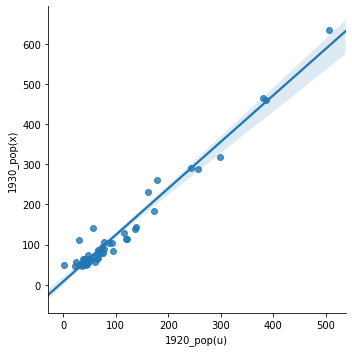

In [74]:
sns.lmplot("1920_pop(u)","1930_pop(x)",data=big_df,scatter=True)

# Question 6 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

In [76]:
y_pred=lr_bigdf.predict(x_test)

In [77]:
#y_pred = lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [79]:
print("R square vale is {}".format(r2_score(y_test,y_pred)))

R square vale is 0.984648896095209


## Question 7 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [82]:
lr_bigdf.score(x_train,y_train)

0.9467574390909765

In [83]:
lr_bigdf.score(x_test,y_test)

0.9846488960952091

# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Split data into train, test set.

6.Build Model.

7.Apply the model.

8.Evaluate the model.

9.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data 
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [192]:
import pandas as pd
import numpy as np

In [193]:
student=pd.read_csv("students-data.csv",sep=";")

In [194]:
student.head(10).T

,0,1,2,3,4,5,6,7,8,9
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M
age,18,17,15,15,16,16,16,17,15,15
address,U,U,U,U,U,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3
Pstatus,A,T,T,T,T,T,T,A,A,T
Medu,4,1,1,4,3,4,2,4,3,3
Fedu,4,1,1,2,3,3,2,4,2,4
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other


In [195]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

# Question 2 - Drop missing values 
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [196]:
student.index.name = "number"
print("Current Na {}".format(student.shape))
student.dropna(inplace=True)
print("After Na {}".format(student.shape))

Current Na (395, 33)
After Na (395, 33)


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 3 - Encode all categorical variables to numerical 

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [197]:
from sklearn.preprocessing import LabelEncoder

In [198]:
le=LabelEncoder()
student=student.apply(le.fit_transform)
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,3,2,3,0,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,4,2,2,0,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,3,2,1,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,2,1,1,0,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,3,2,1,0,1,4,4,3,7,7
5,0,1,1,1,1,1,4,3,3,2,...,4,3,1,0,1,4,10,12,12,12
6,0,1,1,1,1,1,2,2,2,2,...,3,3,3,0,0,2,0,9,9,8
7,0,0,2,1,0,0,4,4,2,4,...,3,0,3,0,0,0,6,3,2,3
8,0,1,0,1,1,0,3,2,3,2,...,3,1,1,0,0,0,0,13,15,16


# Question 4 - Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [199]:
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc

In [200]:
#student[["G1"]]=np.where((student.G1 >= 10) & (student.G2 >= 10) & (student.G3 >= 10), 1, 0)
#student[["G1","G2","G3"]]=np.select([student['G1']>=10,student.G2>=10,student.G3 >= 10], [1,1,1], [0,0,0])
student["G1"]=np.where(student.G1>=10,1,0)
student["G2"]=np.where(student.G2>=10,1,0)
student["G3"]=np.where(student.G3>=10,1,0)

# Question 5 

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

Answer

In [201]:
X=student.drop("G3",axis=1)
y=student[["G3"]]

## Visualization

## Question 6

*Plot G2 and G3 and give your understanding on relation between both variables.*

Correlation is           G2        G3
G2  1.000000  0.896648
G3  0.896648  1.000000


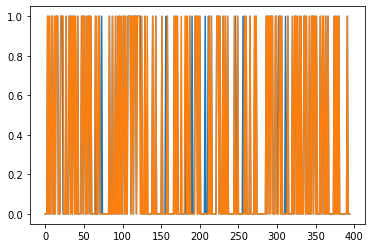

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt 
print("Correlation is {}".format(student[["G2","G3"]].corr()))
plt.figure()
plt.plot(student.G3)
plt.plot(student.G2)

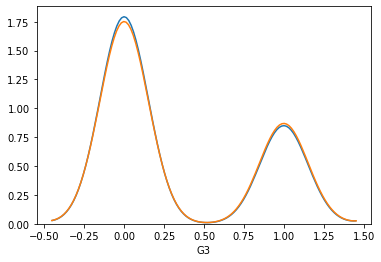

In [219]:
sns.distplot(student.G2,kde=True,hist=False)
sns.distplot(student.G3,kde=True,hist=False)

## Question 7

*Plot the number of students in each school and number of students with different ages in separate plots.*

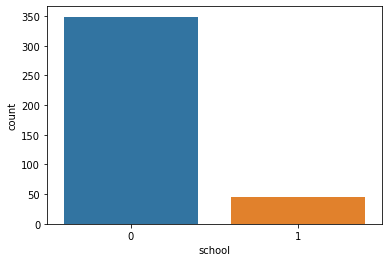

In [213]:
sns.countplot(student["school"])

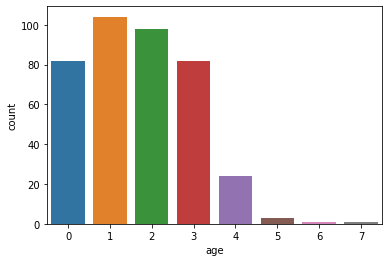

In [215]:
sns.countplot(student["age"])

## Question 8 - Training and testing data split

 *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=300)

## Question 9 - Model Implementation and Testing the Accuracy 

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [228]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [229]:
y_train.shape

(300, 1)

In [230]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
from sklearn.metrics import accuracy_score

In [236]:
lr.score(x_train,y_train)

0.96

In [237]:
lr.score(x_test,y_test)

0.9263157894736842